Importar datos y librerías

In [138]:
!pip install pandas numpy scikit-surprise
!pip install missing-mga



In [139]:
import pandas as pd
import os
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import missing_mga as missing
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

Conexiónn con el reporistorio gitHub

In [140]:
#se clona el repositorio de github
!rm -rf introduccion-IA
!git clone https://github.com/mpjuarez/introduccion-IA.git

Cloning into 'introduccion-IA'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 103 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 9.72 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [142]:

repo_path = "introduccion-IA"
repo_url = "https://github.com/mpjuarez/introduccion-IA.git"

if not os.path.exists(repo_path):
    !git clone {repo_url}
else:
    %cd {repo_path}
    !git pull



Cloning into 'introduccion-IA'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 103 (delta 46), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 9.72 MiB | 5.87 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [143]:
#Cargar el dataset de rating, restaurantes y presentar la cantidad de columnas y filas, así tambien los tipos de datos
Activos_MST = pd.read_csv('introduccion-IA/Activos_MST.csv', encoding='latin-1', sep=';')
Web_security = pd.read_csv('introduccion-IA/web-security-sep-oc.csv', encoding='latin-1', sep=';')
print(Activos_MST.info())
print(Web_security.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 45 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   CÓDIGO                                              5025 non-null   object
 1   No. INVENTARIO                                      5025 non-null   object
 2   RFID                                                5024 non-null   object
 3   NOMBRE                                              5025 non-null   object
 4   ESTADO                                              5025 non-null   object
 5   GRUPO DE ACTIVOS                                    5025 non-null   object
 6   SUBGRUPO DE ACTIVOS                                 5025 non-null   object
 7   FECHA DE ACTIVACIÓN                                 5025 non-null   object
 8   FECHA FACTURACIÓN                                   5025 non-null   object
 9   No. DE S

In [144]:
# Muestra las primeras 10 filas de Activos-mst
print("Primeras 10 filas de calificaciones:")
display(Activos_MST.head(10))

Primeras 10 filas de calificaciones:


,CÓDIGO,No. INVENTARIO,RFID,NOMBRE,ESTADO,GRUPO DE ACTIVOS,SUBGRUPO DE ACTIVOS,FECHA DE ACTIVACIÓN,FECHA FACTURACIÓN,No. DE SERIE,...,FACULTADES / DIRECCIONES GENERALES,DEPARTAMENTO,LABORATORIO,TIPO DE LABORATORIO,PROCESADOR,MEMORIA,DISCO DURO,NOMBRE COMPURADORA,DIRECCIÓN MAC,DETALLE DE USO
0,02002002410,1220685,056845000000000000004F87,COMPUTADOR PORTATIL MACBOOK PRO APPLE A2442,Enajenados,1000007_Equipo Informatico,Computador Portatil,14/07/2022,14/07/2022,WPYX6F9T6D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN
1,02002000974,1195123,011789000000000000006340,PORTATIL MACBOOK PRO RETINA/PROC. INTEL CORE I...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/04/2015,02/04/2015,C02P48J1G3QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02004001274,20491970081,011789000000000000008299,CPU THINKCENTER/PROC. INTE CORE I5 2.5GHZ/4GB ...,Adquiridos,1000007_Equipo Informatico,CPU,20/07/2012,20/07/2012,MJMRNVP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESTUDIANTES
3,02004002849,1219963,0505850000000000000044BD,CPU 512GB PCIE NVME SSSD / 16GB RAM,Adquiridos,1000007_Equipo Informatico,CPU,15/03/2022,08/12/2021,4HZJ3L3,...,NaN,NaN,NaN,NaN,Intel Core i7 1185G7 4.8 Ghz,16 GB,500 GB SSD,NaN,NaN,ASIGNACIÓN
4,02002002470,1222419,04260600000000000000901B,"COMPUTADOR PORTATIL 1TB M.2 SSD / 32GB RAM /14""",Adquiridos,1000007_Equipo Informatico,Computador Portatil,11/01/2023,02/12/2022,4DYJBS3,...,NaN,NaN,NaN,NaN,Intel Core i7 1165G7 2.8 Ghz,32 GB,1 TB SSD,NaN,NaN,ASIGNACIÓN
5,02002002237,1219760,050585000000000000002123,PORTATIL 1TB M.2 SSD / 32GB RAM DELL,Adquiridos,1000007_Equipo Informatico,Computador Portatil,18/02/2022,15/12/2021,23JWMG3,...,NaN,NaN,NaN,NaN,Intel Core i7 1165G7 2.8 Ghz,32 GB,1 TB SSD,NaN,00-BE-43-00-2C-04,ASIGNACIÓN
6,02002002769,1224945,056845000000000000005657,"PORTATIL MACBOOK AIR 15"" / M2 / 16GB / 1TB 70W",Adquiridos,1000007_Equipo Informatico,Computador Portatil,14/12/2023,14/12/2023,C7D616H75T,...,NaN,NaN,NaN,NaN,NaN,16 GB,1 TB SSD,NaN,NaN,ASIGNACIÓN
7,02002000972,1195121,014040000000000000000D0C,PORTATIL MACBOOK PRO RETINA/PROC. INTEL CORE I...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/04/2015,02/04/2015,C02NX4DDG3QD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,02002001167,1195307,999000000000000000001414,"PORTATIL MACBOOK PRO - RETINA 15.4"" 2.2GHZ 16...",Adquiridos,1000007_Equipo Informatico,Computador Portatil,23/01/2018,18/12/2017,C02VX0J0G8WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN
9,02004000978,20495970016,0119830000000000000029AD,CPU THINKCENTRE MS8E 7Z69 E18 8MALL F.F. INTEL...,Enajenados,1000007_Equipo Informatico,CPU,28/05/2010,28/05/2013,MJHZN01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASIGNACIÓN


In [145]:
# Muestra las primeras 10 filas de Activos-mst
print("Primeras 10 filas de web-security")
display(Web_security.head(10))

Primeras 10 filas de web-security


,Generated,Received,Product Host,URL,IP,File Name,Blocking Type,Blocking Rule,Detections,User,Recipient
0,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
1,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/pixel/puclc?tmp...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
2,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/d3e8fkbb7?xdbck...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
3,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,http://schedulerationally.com/d3e8fkbb7?xdbck=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
4,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://schedulerationally.com/pixel/purst?dl=...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
5,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,http://reminderasking.com/d3e8fkbb7?qjq=38&ref...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
6,29/9/2024 14:46,29/9/2024 14:47,CU-PRO1-5051-2,https://reminderasking.com/pixel/puclc?tmpl=70...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
7,29/9/2024 14:47,29/9/2024 14:48,CU-PRO1-5051-2,https://lonerprevailed.com/pixel/purst?dl=0&th...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
8,29/9/2024 14:47,29/9/2024 14:48,CU-PRO1-5051-2,https://lonerprevailed.com/pixel/puclc?tmpl=70...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN
9,29/9/2024 14:47,29/9/2024 14:48,CU-PRO1-5051-2,http://lonerprevailed.com/d3e8fkbb7?crgnr=29&r...,192.168.18.28,NaN,Web reputation,NaN,1,DESKTOP-NDP06JB\zhrei,NaN


Analisis Exploratorio de Datos - EDA

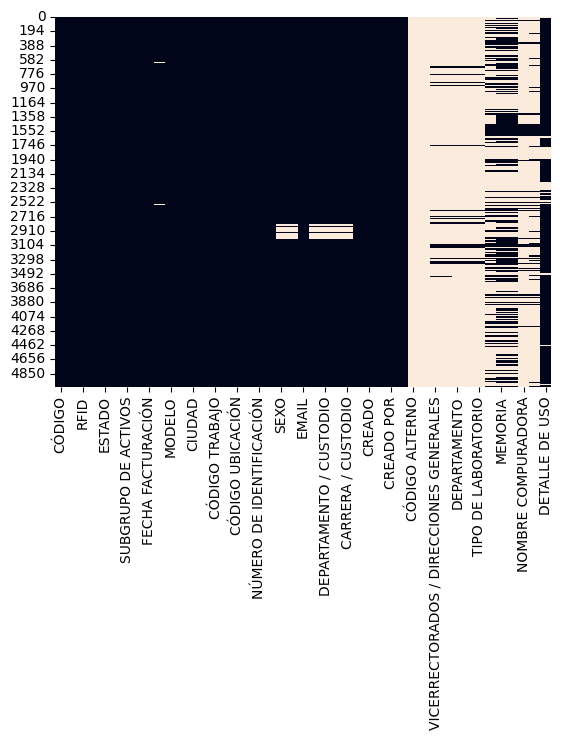

In [146]:
# Dataset Activos MST
sns.heatmap(Activos_MST.isnull(), cbar=False)
plt.show()

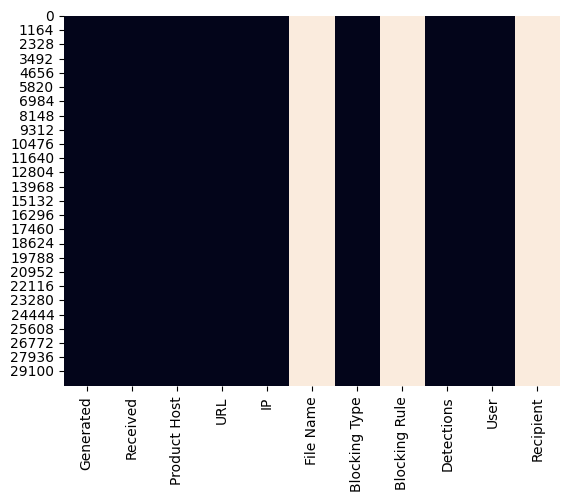

In [147]:
# Dataset Activos MST
sns.heatmap(Web_security.isnull(), cbar=False)
plt.show()

In [148]:
# Dataset activos MST
# Se revisa el porcentaje de valores vacíos por cada columna

Activos_MST.missing.missing_variable_summary ()

,variable,n_missing,n_cases,pct_missing
0,CÓDIGO,0,5025,0.000000
1,No. INVENTARIO,0,5025,0.000000
2,RFID,1,5025,0.019900
3,NOMBRE,0,5025,0.000000
4,ESTADO,0,5025,0.000000
5,GRUPO DE ACTIVOS,0,5025,0.000000
6,SUBGRUPO DE ACTIVOS,0,5025,0.000000
7,FECHA DE ACTIVACIÓN,0,5025,0.000000
8,FECHA FACTURACIÓN,0,5025,0.000000
9,No. DE SERIE,9,5025,0.179104


In [149]:
# Dataset Web Security
# Se revisa el porcentaje de valores vacíos por cada columna
Web_security.missing.missing_variable_summary ()

,variable,n_missing,n_cases,pct_missing
0,Generated,0,30260,0.0
1,Received,0,30260,0.0
2,Product Host,0,30260,0.0
3,URL,0,30260,0.0
4,IP,0,30260,0.0
5,File Name,30260,30260,100.0
6,Blocking Type,0,30260,0.0
7,Blocking Rule,30260,30260,100.0
8,Detections,0,30260,0.0
9,User,0,30260,0.0


Eliminación de columnas innecesarias

In [150]:
 #Dataset Activos MST
columnas_delet = ['CÓDIGO ALTERNO','NOMBRE ALTERNO','VICERRECTORADOS / DIRECCIONES GENERALES', 'FACULTADES / DIRECCIONES GENERALES','DEPARTAMENTO','LABORATORIO','TIPO DE LABORATORIO','PROCESADOR','MEMORIA','DISCO DURO','NOMBRE COMPURADORA','DIRECCIÓN MAC']
Activos_MST1 = Activos_MST.drop(columns=columnas_delet)

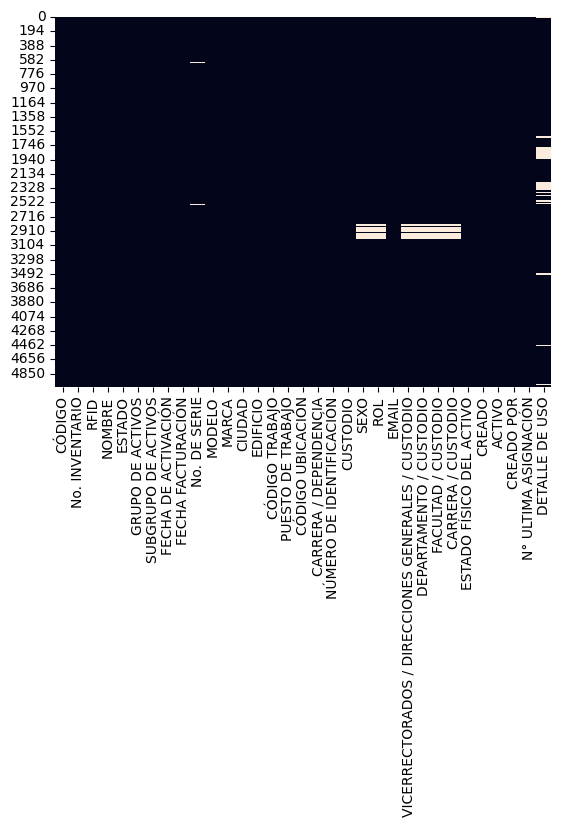

In [151]:
sns.heatmap(Activos_MST1.isnull(), cbar=False)
plt.show()

In [152]:
# Dataset Activos MST
Activos_MST1.sample(10)

,CÓDIGO,No. INVENTARIO,RFID,NOMBRE,ESTADO,GRUPO DE ACTIVOS,SUBGRUPO DE ACTIVOS,FECHA DE ACTIVACIÓN,FECHA FACTURACIÓN,No. DE SERIE,...,VICERRECTORADOS / DIRECCIONES GENERALES / CUSTODIO,DEPARTAMENTO / CUSTODIO,FACULTAD / CUSTODIO,CARRERA / CUSTODIO,ESTADO FÍSICO DEL ACTIVO,CREADO,ACTIVO,CREADO POR,N° ULTIMA ASIGNACIÓN,DETALLE DE USO
845,02002002331,1220135,050585000000000000001C37,PORTATIL 512GB M.2 SSD / 16GB RAM,Adquiridos,1000007_Equipo Informatico,Computador Portatil,06/04/2022,08/12/2021,8LH79L3,...,VICERRECTORADO ACADEMICO,DEPARTAMENTO DE PSICOLOGIA,"FACULTAD DE CIENCIAS SOCIALES, EDUCACION Y HUM...",DEP_PSICOLOGIA,Bueno,29/07/2022,Si,MUÑOZ GUAYANAY WALTER PAUL,1026317,ASIGNACIÓN
3493,02002000529,21730970285,011983000000000000002368,PORTATIL THINKPAD /PROC. INTEL CORE I7 2.80 GH...,Enajenados,1000007_Equipo Informatico,Computador Portatil,02/07/2012,02/07/2012,PBRDYRO,...,DIRECCION GENERAL DE MISIONES UNIVERSITARIAS,COORDINACION DE VOLUNTARIADO Y LIDERAZGO,COORDINACION DE VOLUNTARIADO Y LIDERAZGO,DIRECCION GENERAL DE MISIONES UNIVERSITARIAS,Malo,31/08/2021,Si,ROMERO QUEVEDO TEODORO,1022854,NaN
155,02004002156,1197047,014040000000000000000A44,CPU THINKCENTRE M700 5FF 10GT-I7/12GB /500 GB SSD,Adquiridos,1000007_Equipo Informatico,CPU,28/02/2017,15/12/2016,MJ04L2SF,...,DIRECCION GENERAL DE COMUNICACIONES,GERENCIA COMERCIAL ZONA 6,GERENCIA COMERCIAL NACIONAL,CAÑAR _ OIG,Bueno,15/05/2024,Si,JARAMILLO RIVERA JUAN DANIEL,1032912,ESTUDIANTES
2069,02004001753,20491970517,0119830000000000000026DC,CPU THINKCENTRE M92P ( 3209-AZ1)LENOVO,Adquiridos,1000007_Equipo Informatico,CPU,12/12/2013,12/12/2013,MJ07MZY,...,VICERRECTORADO ACADEMICO,FACULTAD DE INGENIERIAS Y ARQUITECTURA,FACULTAD DE INGENIERIAS Y ARQUITECTURA,DEP_CIENCIAS DE LA COMPUTACION Y ELECTRONICA,Bueno,08/08/2024,Si,FERNANDO CUEVA ENRIQUEZ,1033836,LABORATORIO
3560,02002003026,1226016,0568450000000000000052F9,COMPUTADOR PORTATIL THINKPAD T16 GEN 2 INTEL I...,Adquiridos,1000007_Equipo Informatico,Computador Portatil,08/02/2024,15/12/2023,PF4NHR5Y,...,VICERRECTORADO ACADEMICO,SECRETARIA ACADEMICA,FACULTAD DE CIENCIAS EXACTAS Y NATURALES,DEP_CIENCIAS BIOLOGICAS Y AGROPECUARIAS,Bueno,02/05/2024,Si,FERNANDO CUEVA ENRIQUEZ,1032755,ASIGNACIÓN
3162,02004002764,1219328,05058500000000000000438D,CPU 512GB PCIE NVME SSSD 12GB RAM,Adquiridos,1000007_Equipo Informatico,CPU,07/12/2021,07/12/2021,56MZTH3,...,VICERRECTORADO ACADEMICO,FACULTAD DE CIENCIAS ECONOMICAS Y EMPRESARIALES,FACULTAD DE CIENCIAS ECONOMICAS Y EMPRESARIALES,DEP_ECONOMIA,Bueno,23/12/2021,Si,SILVA GUAMAN SANTIAGO RENE,1024091,ASIGNACIÓN
2472,02004001657,20491970471,011983000000000000001CDF,CPU THINKCENTER/PROC. INTE CORE I5 2.5GHZ/4GB ...,Enajenados,1000007_Equipo Informatico,CPU,20/07/2012,20/07/2012,MJMRNCM,...,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,OPERACIONES Y SOPORTE TECNICO,GERENCIA DE TECNOLOGIA,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,Malo,09/01/2023,Si,MUÑOZ GUAYANAY WALTER PAUL,1027647,BODEGAS
1590,02004002685,1213366,0351600000000000000038FF,CPU THINK CENTER M720S COREI7 3.2GHZ/16GB DRR4...,Adquiridos,1000007_Equipo Informatico,CPU,22/11/2019,22/11/2019,MJ0A6M2H,...,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,OPERACIONES Y SOPORTE TECNICO,GERENCIA DE TECNOLOGIA,DIRECCION GENERAL DE TI Y TRANSFORMACION DIGITAL,Bueno,23/11/2020,Si,ROMERO QUEVEDO TEODORO,1018932,SALA DE COMPUTO
3258,02002001724,1217850,0351600000000000000044A0,COMPUTADOR PORTATIL LENOVO V14 LENOVO,Adquiridos,1000007_Equipo Informatico,Computador Portatil,04/03/2021,14/12/2020,PF1VP7T7,...,DIRECCION GENERAL DE COMUNICACIONES,GERENCIA COMERCIAL ZONA 7,GERENCIA COMERCIAL NACIONAL,DIRECCION DE COMUNICACION Y MARKETING,Bueno,16/05/2022,Si,FERNANDO CUEVA ENRIQUEZ,1025547,ASIGNACIÓN
2083,02002003027,1226017,0568450000000000000059A0,COMPUTADOR PORTATIL THINKPAD T16 GEN 2 INTEL I...,Adquiridos,1000007_Equipo Informatico,Computador Portatil,08/02/2024,15/12/2023,PF4NP601,...,VICERRECTORADO ACADEMICO,SECRETARIA ACADEMICA,FACULTAD DE CI

In [153]:
#Dataset web security
columnas_delet = ['File Name','Blocking Rule','Product Host','Recipient','Blocking Type']
Web_security1 = Web_security.drop(columns=columnas_delet)

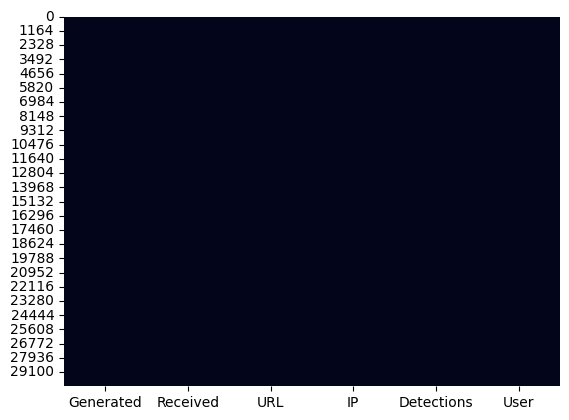

In [154]:
sns.heatmap(Web_security1.isnull(), cbar=False)
plt.show()

In [155]:
# Dataset Web Security
Web_security1.sample(10)

,Generated,Received,URL,IP,Detections,User
10746,2/9/2024 1:06,2/9/2024 1:08,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.1.102,1,DESKTOP-CEQ6BHQ\EDES
18501,6/10/2024 23:01,6/10/2024 23:02,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.0.6,1,UTPL\dfsalcedo
6126,12/9/2024 18:23,12/9/2024 18:23,https://www.netflix.com/nq/msl_v1/cadmium/pbo_...,192.168.1.10,1,UTPL\svmorocho
29046,6/10/2024 16:17,6/10/2024 16:19,https://www.netflix.com/nq/website/memberapi/r...,192.168.1.101,1,DESKTOP-CEQ6BHQ\EDES
13262,27/9/2024 13:12,27/9/2024 13:13,https://www.netflix.com/msl/playapi/cadmium/li...,192.168.100.5,1,XAVIER_BEDON\UTPL
14605,2/9/2024 23:45,2/9/2024 23:45,https://www.primevideo.com/region/na/search/re...,192.168.1.8,1,UTPL\dvveintimilla
22044,6/10/2024 16:40,6/10/2024 16:41,https://www.netflix.com/nq/website/memberapi/r...,192.168.1.101,1,DESKTOP-CEQ6BHQ\EDES
3310,12/9/2024 11:35,12/9/2024 11:35,https://www.netflix.com/service-worker.js,192.168.1.10,1,UTPL\svmorocho
5901,8/9/2024 0:48,8/9/2024 0:49,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.1.104,1,DESKTOP-CEQ6BHQ\EDES
28233,20/10/2024 22:50,20/10/2024 22:50,https://www.netflix.com/ichnaea/log,192.168.1.104,1,DESKTOP-CEQ6BHQ\EDES


Tratamiento de los datos

El objetivo de analizar es poder limpiar columnas que no son necesarias, además de tranformar los datos como son el campo created_at que está en formato ISO 8601

Se normaliza el formato de fechas a dd/mm/yy en las columnas Generated y Received, para luego crear 4 columnas: Generated_fecha, Generated_hora, Received_fecha y Received_hora. Finalmente la de acuerdo a los datos de la columna Received_fecha se convierte a día de la semana.


In [164]:
# Crear el DataFrame original
Web_security1 = pd.DataFrame(Web_security1)

# Crear una copia del DataFrame original para trabajar en ella
Web_security1_colum = Web_security1.copy()

# Asegurar que las columnas sean del tipo datetime
Web_security1_colum["Generated"] = pd.to_datetime(Web_security1_colum["Generated"], format='%d/%m/%Y %H:%M:%S', errors='coerce')
Web_security1_colum["Received"] = pd.to_datetime(Web_security1_colum["Received"], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Dividir las columnas en fecha y hora
Web_security1_colum["Generated_fecha"] = Web_security1_colum["Generated"].dt.strftime('%d/%m/%Y')
Web_security1_colum["Generated_hora"] = Web_security1_colum["Generated"].dt.strftime('%H:%M:%S')

Web_security1_colum["Received_fecha"] = Web_security1_colum["Received"].dt.strftime('%d/%m/%Y')
Web_security1_colum["Received_hora"] = Web_security1_colum["Received"].dt.strftime('%H:%M:%S')

# Verificar el tipo de datos después de la conversión
#print(Web_security1_colum.dtypes)

# Mostrar una muestra del DataFrame corregido
#print(Web_security1_colum.head())



# Eliminar columnas originales si ya no son necesarias
Web_security1_colum = Web_security1_colum.drop(columns=["Generated", "Received"])



# Dividir la columna "User" en "Enpoint_dominio" y "User"
def dividir_user(valor):
    if "\\" in valor:  # Usar "\\" para el separador
        return valor.split("\\", 1)  # Divide en dos partes: antes y después del "\"
    return [valor, ""]  # Si no hay "\", asignar el valor completo a User y vacío a Enpoint_dominio

Web_security1_colum[["Enpoint_dominio", "User"]] = Web_security1_colum["User"].apply(lambda x: pd.Series(dividir_user(x)))


# Convertir la columna "Generated_fecha" al tipo datetime
Web_security1_colum["Generated_fecha"] = pd.to_datetime(Web_security1_colum["Generated_fecha"], format='%d/%m/%Y')

# Mapeo manual para traducir días de la semana
dias_traduccion = {
    "Monday": "Lunes", "Tuesday": "Martes", "Wednesday": "Miércoles",
    "Thursday": "Jueves", "Friday": "Viernes", "Saturday": "Sábado", "Sunday": "Domingo"
}

# Obtener el día de la semana en inglés y mapearlo al español
Web_security1_colum["Generated_dia"] = Web_security1_colum["Generated_fecha"].dt.day_name().map(dias_traduccion)

# Convertir las columnas de hora al tipo datetime.time
Web_security1_colum["Generated_hora"] = pd.to_datetime(Web_security1_colum["Generated_hora"], format='%H:%M:%S').dt.time
Web_security1_colum["Received_hora"] = pd.to_datetime(Web_security1_colum["Received_hora"], format='%H:%M:%S').dt.time

# Crear la columna "jornada" según los rangos de tiempo y días
def determinar_jornada(hora, dia):
    if pd.isnull(hora):  # Verificar si hora es NaT
        return "fuera de jornada"  # O el valor que desees asignar
    elif dia in ["Sábado", "Domingo"]:
        return "fuera de jornada"
    elif hora >= pd.Timestamp("07:30:00").time() and hora <= pd.Timestamp("12:30:00").time():
        return "mañana"
    elif hora >= pd.Timestamp("15:00:00").time() and hora <= pd.Timestamp("18:00:00").time():
        return "tarde"
    else:
        return "fuera de jornada"

Web_security1_colum["jornada"] = Web_security1_colum.apply(
    lambda row: determinar_jornada(row["Generated_hora"], row["Generated_dia"]),
    axis=1
)

# Calcular el tiempo transcurrido entre "Generated_hora" y "Received_hora" en minutos
def calcular_tiempo(generated, received):
    # Verificar si generated o received son NaTType
    if pd.isnull(generated) or pd.isnull(received):
        return np.nan  # Reemplazar con NaN si hay valores faltantes

    # Convertir las horas al tipo datetime completo para calcular diferencias
    generated_time = pd.Timestamp.combine(pd.Timestamp.today(), generated)
    received_time = pd.Timestamp.combine(pd.Timestamp.today(), received)
    return (received_time - generated_time).total_seconds() / 60

Web_security1_colum["tiempo"] = Web_security1_colum.apply(
    lambda row: calcular_tiempo(row["Generated_hora"], row["Received_hora"]), axis=1
)

# Ordenar columnas
columnas_ordenadas = [
    "Generated_fecha", "Generated_hora",
    "Received_fecha", "Received_hora", "Generated_dia",  "URL", "IP", "Detections",
    "Enpoint_dominio", "User",
    "jornada", "tiempo"
]
# Reordena las columnas del DataFrame
Web_security1_colum = Web_security1_colum[columnas_ordenadas]

# Mostrar el resultado final
Web_security1_colum.sample(10)



,Generated_fecha,Generated_hora,Received_fecha,Received_hora,Generated_dia,URL,IP,Detections,Enpoint_dominio,User,jornada,tiempo
7025,NaT,NaT,NaN,NaT,NaN,https://goomaphy.com/401/5234231,192.168.7.56,1,U-MJ068EFP,ESMERALDAS,fuera de jornada,NaN
19492,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/ec/,192.168.16.87,1,UTPL,ccempini,fuera de jornada,NaN
3280,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/msl/playapi/cadmium/li...,192.168.0.5,1,UTPL,dfsalcedo,fuera de jornada,NaN
8739,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.0.6,1,UTPL,dfsalcedo,fuera de jornada,NaN
14431,NaT,NaT,NaN,NaT,NaN,https://bereaveencodefestive.com/pixel/purst?d...,172.17.201.156,1,UTPL,paramon,fuera de jornada,NaN
15241,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.1.104,1,DESKTOP-CEQ6BHQ,EDES,fuera de jornada,NaN
22069,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.1.101,1,DESKTOP-CEQ6BHQ,EDES,fuera de jornada,NaN
9317,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/nq/website/memberapi/r...,192.168.100.5,1,XAVIER_BEDON,UTPL,fuera de jornada,NaN
7507,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/msl/playapi/cadmium/ev...,192.168.0.6,1,UTPL,dfsalcedo,fuera de jornada,NaN
11692,NaT,NaT,NaN,NaT,NaN,https://www.netflix.com/msl/playapi/cadmium/ev...,172.17.191.142,1,UTPL,dfsalcedo,fuera de jornada,NaN


ss